In [1]:
import numpy as np
np.random.seed(505)
p=0.8
N=100
Num_Stu=90

Scores=np.random.random((Num_Stu, N))<=p
Scores=np.sum(Scores, axis=1)
Scores

array([85, 72, 74, 80, 79, 79, 73, 76, 80, 84, 78, 83, 77, 75, 75, 82, 76,
       78, 80, 85, 76, 78, 78, 79, 77, 78, 81, 76, 83, 79, 81, 81, 80, 80,
       80, 77, 81, 69, 80, 84, 80, 80, 87, 72, 76, 85, 74, 82, 78, 79, 75,
       73, 88, 87, 79, 81, 71, 81, 84, 80, 85, 84, 74, 84, 81, 77, 84, 80,
       78, 74, 74, 80, 85, 75, 81, 83, 75, 71, 85, 75, 78, 70, 82, 81, 74,
       77, 86, 74, 82, 72])

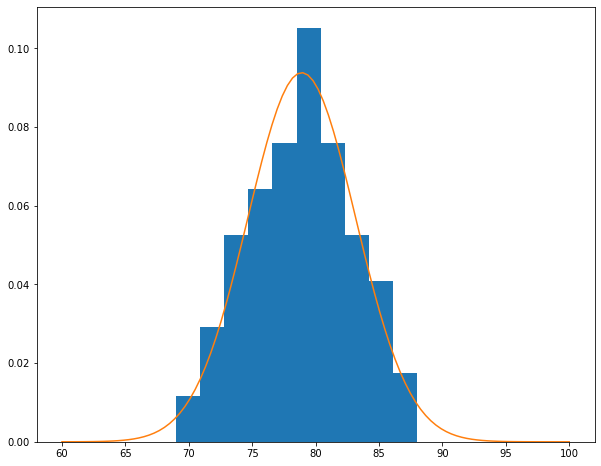

In [2]:
x=np.linspace(60,100,100)
d=[1.0/(np.sqrt(2*np.pi)*Scores.std())*np.exp(-(i-Scores.mean())**2/(2*Scores.std()**2)) for i in x]


import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.hist(Scores, density=1)
plt.plot(x,d)

In [3]:
print(np.sqrt(N*p*(1-p)), Scores.std())

3.9999999999999996 4.2521744618866455


In [4]:
p=0.8
N=70
Num_Stu=90

Scores=np.random.random((Num_Stu, N))<=p
Scores=np.sum(Scores, axis=1)
Scores=Scores+(np.random.random(Num_Stu)<=p)*30
Scores

array([78, 84, 89, 89, 83, 84, 83, 90, 88, 85, 58, 88, 89, 85, 82, 94, 95,
       53, 58, 91, 82, 92, 89, 92, 83, 81, 85, 83, 54, 55, 84, 87, 88, 93,
       87, 81, 89, 91, 90, 90, 85, 89, 79, 58, 86, 89, 85, 94, 82, 59, 82,
       56, 57, 80, 53, 85, 89, 91, 81, 85, 86, 59, 56, 83, 90, 91, 85, 84,
       58, 87, 88, 94, 82, 86, 86, 58, 51, 83, 57, 89, 56, 95, 86, 55, 87,
       89, 88, 59, 84, 91])

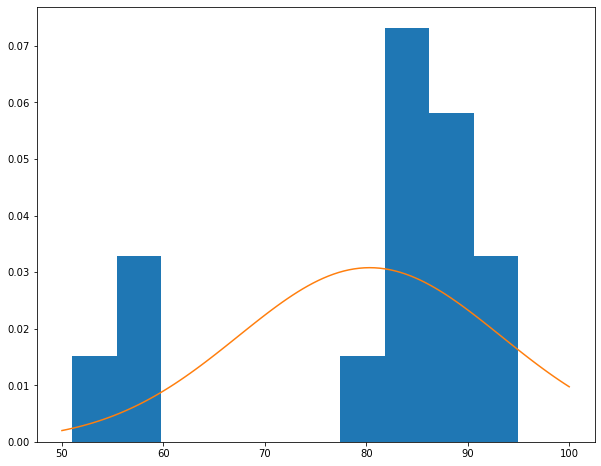

In [5]:
x=np.linspace(50,100,100)
d=[1.0/(np.sqrt(2*np.pi)*Scores.std())*np.exp(-(i-Scores.mean())**2/(2*Scores.std()**2)) for i in x]


import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.hist(Scores, density=1)
plt.plot(x,d)

In [6]:
N=100
Num_Stu=90

p=np.random.beta( 0.5, 0.4, Num_Stu)
Scores=np.random.random((N, Num_Stu))<=p
Scores=Scores<=p
Scores=np.sum(Scores, axis=0)
Scores

array([ 52,  51,  44,  27,  46,  97,  35,  19,  92,  22,  73,  52,  11,
        29,  74,  95,  59,   1,  46,  34,  78,  58,  84,   1,  23,   2,
        95,  13,  83,  75,   0,  31,  99,  37,  35,  65, 100,  45,   0,
         9,   5,  85,  18,   7,   0,  10,   0,  89,  94,  10,  79, 100,
        66,  55,  43,  12,   0,  20,  52,  60,  78,  91,  65,   3, 100,
        31,  80,   4,  68,   3,  10,  31, 100,  90,  98,  40,   3,  99,
        32,  81,   0,  42,  95,  46,  57,  98,  57,  74,   2,  49])

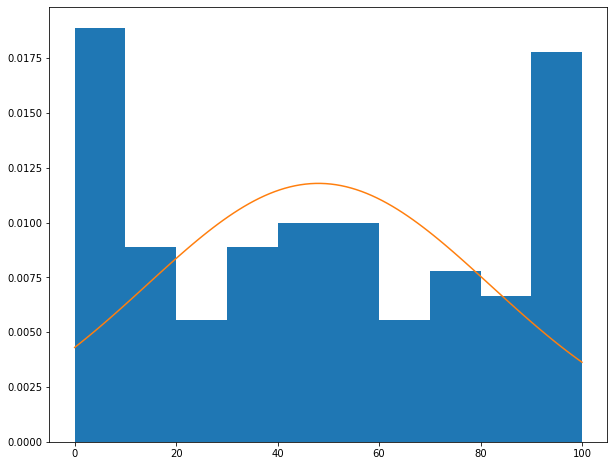

In [7]:
x=np.linspace(0,100,100)
d=[1.0/(np.sqrt(2*np.pi)*Scores.std())*np.exp(-(i-Scores.mean())**2/(2*Scores.std()**2)) for i in x]


import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.hist(Scores, density=1)
plt.plot(x,d)

In [8]:
import pandas as pd
data=pd.read_csv("stat_midterm_score.csv")
data=data.dropna()
data.head(10)

,Scores
0,1
1,17
2,17
3,1
4,1
5,17
6,82
7,82
8,58
9,58


(array([19., 10., 10., 16.,  7.,  9.,  7.,  5.,  6.,  5.]),
 array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
         90.1, 100. ]),
 <a list of 10 Patch objects>)

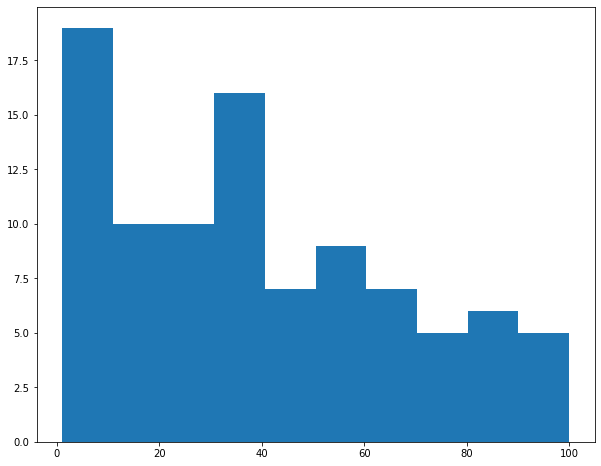

In [9]:
plt.hist(data['Scores'])

In [10]:
from scipy.optimize import minimize
from scipy import special

def estimate(x):
    ## 目标函数
    def obj(theta):
        alpha=theta[0]
        beta=theta[1]
        return -1.0*np.sum(special.loggamma(alpha+beta)
                      +special.loggamma(x+alpha)
                      +special.loggamma(100-x+beta)
                     -special.loggamma(alpha)
                     -special.loggamma(beta)
                     -special.loggamma(100+alpha+beta))
    ## 求最优化
    res=minimize(obj, np.array([1,1]), \
                 method='nelder-mead', \
                 options={'xtol': 1e-2, 'disp': True})
    return res

theta=estimate(data['Scores']).x
print("alpha=",theta[0])
print("beta=",theta[1])
print("Mean score=", data['Scores'].mean())
print("Beta Expectation=", theta[0]/(theta[0]+theta[1]))

Optimization terminated successfully.
         Current function value: 4673.826178
         Iterations: 20
         Function evaluations: 39
alpha= 0.7236912727355953
beta= 1.1806538343429558
Mean score= 38.755319148936174
Beta Expectation= 0.3800210739353895


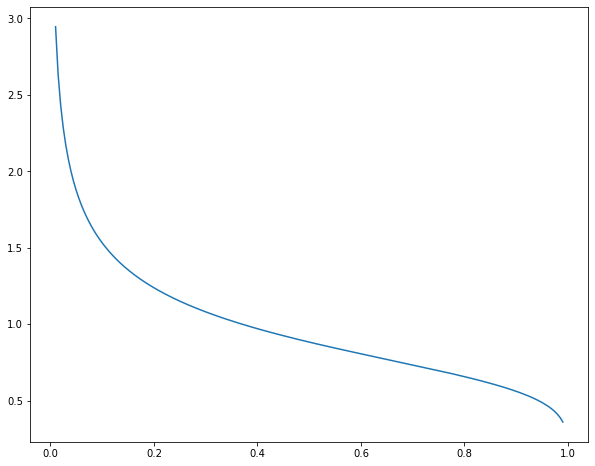

In [11]:
x=np.linspace(0.01,0.99,200)
d=np.exp(special.loggamma(theta[0]+theta[1])-special.loggamma(theta[0])-special.loggamma(theta[1])
         +(theta[0]-1)*np.log(x)+(theta[1]-1)*np.log((1-x)))


import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(x,d)

In [12]:
data['pi']=(data['Scores']+theta[0])/((theta[1]+theta[0])+100)*100
data.head(20)

,Scores,pi
0,1,1.691480
1,17,17.392478
2,17,17.392478
3,1,1.691480
4,1,1.691480
5,17,17.392478
6,82,81.177786
7,82,81.177786
8,58,57.626288
9,58,57.626288


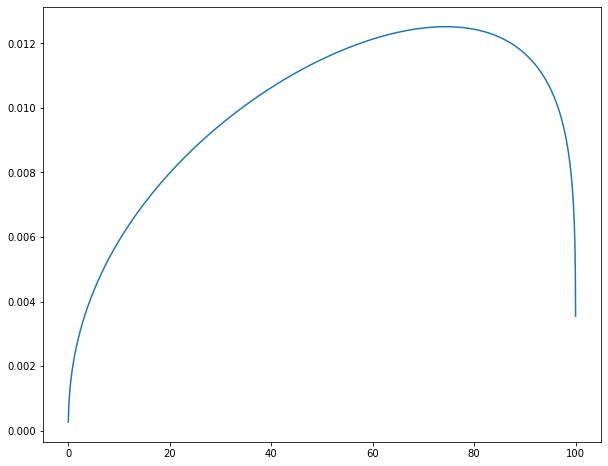

In [13]:
x=np.linspace(0.01,99.99,2000)
d=np.exp(special.loggamma(theta[0]+theta[1])-special.loggamma(theta[0])-special.loggamma(theta[1])
         +(theta[0]-1)*np.log(((x**2)/10000))+(theta[1]-1)*np.log((1-((x**2)/10000)))+np.log(2*x)-np.log(10000))



import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(x,d)